In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2, os
import random
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
Altered_data =  np.load('/content/drive/MyDrive/DL_project/Altered_level.npy',allow_pickle=True)
import random
from sklearn.utils import shuffle
data = shuffle(Altered_data)

In [ ]:
np.shape(Altered_data)

(49270, 5)

In [ ]:
img_size = 96
X_data,y_data=[],[]
# sample data [ID,G, fingerNum, img_resize, "Easy/Medium/Hard"]

for _,_, _, feature,l in Altered_data:
    X_data.append(feature)
    y_data.append(l)

In [ ]:
len(y_data)

49270

In [ ]:
img_size = 96
X_data = np.array(X_data).reshape(-1, img_size, img_size, 1)
X_data = X_data /255.0 # Normalize to [0, 1]

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_data = label_encoder.fit_transform(y_data)  
y_data = to_categorical(y_data)


In [ ]:
y_data   # column1 -> Easy    column2 -> Medium    column3 -> Hard 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=12)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
print("Shapes:                  Feature shape    label shape")
print("----------------------------------------------------")
print("Gender_Train:      ", np.shape(x_train), np.shape(y_train))
print("Gender_Validation: ", np.shape(x_val), np.shape(y_val))
print("Gender_Test:       ", np.shape(x_test), np.shape(y_test))

del Altered_data, X_data , y_data

Shapes:                  Feature shape    label shape
----------------------------------------------------
Gender_Train:       (31532, 96, 96, 1) (31532, 3)
Gender_Validation:  (7884, 96, 96, 1) (7884, 3)
Gender_Test:        (9854, 96, 96, 1) (9854, 3)


In [ ]:
nets = 1
model = [0] * nets
final_Dense_units = [3]
model_name = ['FingerNum_Mod']
for i in range(nets):
    model[i] = Sequential(name=model_name[i])

    model[i].add(layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (96, 96, 1)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(64,(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(128,(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(256, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[i], activation='softmax'))

    # Complete with Adam optimizer and entropy cost
    model[i].compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    model[i].summary()

Model: "FingerNum_Mod"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 92, 92, 32)        832       
                                                                 
 batch_normalization_3 (Batc  (None, 92, 92, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 42, 42, 64)        51264     
                                                                 
 batch_normalization_4 (Batc  (None, 42, 42, 64)       256       
 hNormalization)                                                 
                                                     

In [ ]:
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 30
batch_size = 64
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1),
        callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]

In [ ]:
history[0] = model[0].fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (x_val, y_val),
                    verbose = 1, callbacks= CallBack[0])

Epoch 1/30
493/493 [==============================] - 38s 56ms/step - loss: 1.1000 - accuracy: 0.5454 - val_loss: 1.2592 - val_accuracy: 0.4760 - lr: 1.0000e-04
Epoch 2/30
493/493 [==============================] - 27s 55ms/step - loss: 0.8792 - accuracy: 0.6423 - val_loss: 0.8031 - val_accuracy: 0.6763 - lr: 1.0000e-04
Epoch 3/30
493/493 [==============================] - 26s 53ms/step - loss: 0.7728 - accuracy: 0.6983 - val_loss: 0.7266 - val_accuracy: 0.7107 - lr: 1.0000e-04
Epoch 4/30
493/493 [==============================] - 27s 54ms/step - loss: 0.6869 - accuracy: 0.7407 - val_loss: 0.6641 - val_accuracy: 0.7405 - lr: 1.0000e-04
Epoch 5/30
493/493 [==============================] - 26s 53ms/step - loss: 0.6231 - accuracy: 0.7637 - val_loss: 0.6102 - val_accuracy: 0.7601 - lr: 1.0000e-04
Epoch 6/30
493/493 [==============================] - 27s 55ms/step - loss: 0.5731 - accuracy: 0.7888 - val_loss: 0.5933 - val_accuracy: 0.7723 - lr: 1.0000e-04
Epoch 7/30
493/493 [==============

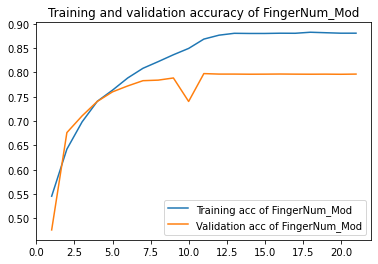

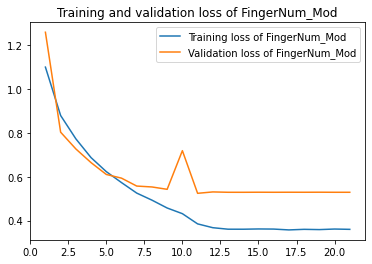

In [ ]:
acc = [0] * nets
val_acc = [0] * nets
loss = [0] * nets
val_loss = [0] * nets
for i in range(nets):
    acc[i] = history[i].history['accuracy']
    val_acc[i] = history[i].history['val_accuracy']
    loss[i] = history[i].history['loss']
    val_loss[i] = history[i].history['val_loss']

    epochs = range(1, len(acc[i]) + 1)
    # plot figures models
    plt.figure()
    plt.plot(epochs, acc[i], label='Training acc of '+model_name[i])
    plt.plot(epochs, val_acc[i], label='Validation acc of '+model_name[i])
    plt.title('Training and validation accuracy of '+model_name[i])
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss[i],  label='Training loss of '+model_name[i])
    plt.plot(epochs, val_loss[i], label='Validation loss of '+model_name[i])
    plt.title('Training and validation loss of '+model_name[i])
    plt.legend()

In [ ]:
test_loss,test_acc = model[0].evaluate(x_test, y_test)
#accuracy_score
print("The testing accuracy of the model - " + str(round(test_acc*100,2)) + "%")

308/308 [==============================] - 4s 12ms/step - loss: 0.5029 - accuracy: 0.8073
The testing accuracy of the model - 80.73%


In [ ]:
y_pred = model[0].predict(x_test)

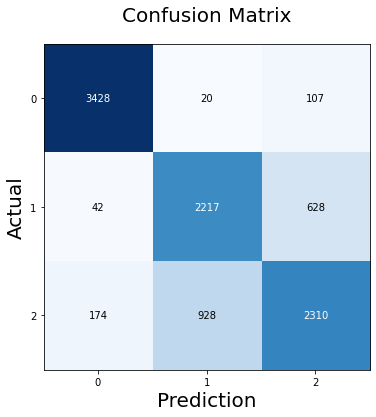

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

labels= ['Easy', 'Medium','Hard']
cf = confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1))
fig, ax = plot_confusion_matrix(conf_mat=cf, figsize=(9, 6))
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
print(classification_report(y_test.argmax(axis = 1),y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3555
           1       0.70      0.77      0.73      2887
           2       0.76      0.68      0.72      3412

    accuracy                           0.81      9854
   macro avg       0.80      0.80      0.80      9854
weighted avg       0.81      0.81      0.81      9854

